In [593]:
import pandas as pd
import os
import sys
import missingno as msno

# Importing the data

In [594]:
os.getcwd()

'C:\\Users\\kople\\Documents\\Personal Git repos\\Water-Quality-Prediction\\notebooks'

In [595]:
df = pd.read_csv('C:/Users/kople/Documents/Personal Git repos/Water-Quality-Prediction/data/raw/water_dataX.csv',encoding='ISO-8859-1')

In [596]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

# EDA on Indian dataset

In [598]:
df.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

Converting the columns to numeric type

In [599]:
df['STATION CODE']= pd.to_numeric(df['STATION CODE'],errors='coerce')

In [600]:
df[df['STATION CODE'].isnull()]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
260,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,2013
431,NaN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,2013
1782,NaN,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",NAN,28,5.6,7.65,375.2,1.758,1.995,2636,18417,2005
1783,NaN,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",NAN,NAN,NAN,7.76,233.3,10.825,5.657,NAN,NAN,2005
1784,NaN,"DAMANGANGA AFTER CONFL. OF PIPARIA DRAIN, DAMAN",NAN,NAN,NAN,NAN,NAN,1,1.01,1200,37000,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,NaN,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,28,6.6,7.49,571.5,2.091,0.256,151,273,2005
1898,NaN,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,5.4,7.16,75.8,2.092,NAN,404,513,2005
1899,NaN,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,30,5.4,7.37,104.8,1.802,0.215,456,557,2005
1900,NaN,"CHANDRAPUR, AGARTALA D/S OF HAORA RIVER, TRIPURA",NAN,29,5.3,7.37,102.2,2.552,0.202,526,583,2005


In [601]:
df['Temp']= pd.to_numeric(df['Temp'],errors='coerce')

In [602]:
df['D.O. (mg/l)']= pd.to_numeric(df['D.O. (mg/l)'],errors='coerce')

In [603]:
df['PH']= pd.to_numeric(df['PH'],errors='coerce')

In [604]:
df['CONDUCTIVITY (µmhos/cm)']= pd.to_numeric(df['CONDUCTIVITY (µmhos/cm)'],errors='coerce')

In [605]:
df['B.O.D. (mg/l)']= pd.to_numeric(df['B.O.D. (mg/l)'],errors='coerce')

In [606]:
df['NITRATENAN N+ NITRITENANN (mg/l)']= pd.to_numeric(df['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')

In [607]:
df['FECAL COLIFORM (MPN/100ml)']= pd.to_numeric(df['FECAL COLIFORM (MPN/100ml)'],errors='coerce')

In [608]:
df['TOTAL COLIFORM (MPN/100ml)Mean']= pd.to_numeric(df['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [609]:
df['year'] = pd.to_datetime(df.year, format='%Y')
df.year = pd.DatetimeIndex(df.year).year

In [610]:
df.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [611]:
df

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


# Renaming columns

In [612]:
df.rename(columns={"STATION CODE":"station","LOCATIONS":"location","STATE":"state","D.O. (mg/l)":"do","PH":"ph","CONDUCTIVITY (µmhos/cm)":"conductivity","B.O.D. (mg/l)":"BOD","NITRATENAN N+ NITRITENANN (mg/l)":"nn","FECAL COLIFORM (MPN/100ml)":"fecal_coliform","TOTAL COLIFORM (MPN/100ml)Mean":"total_coliform_mean"}, inplace=True)

In [613]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


Checking missing values

<AxesSubplot:>

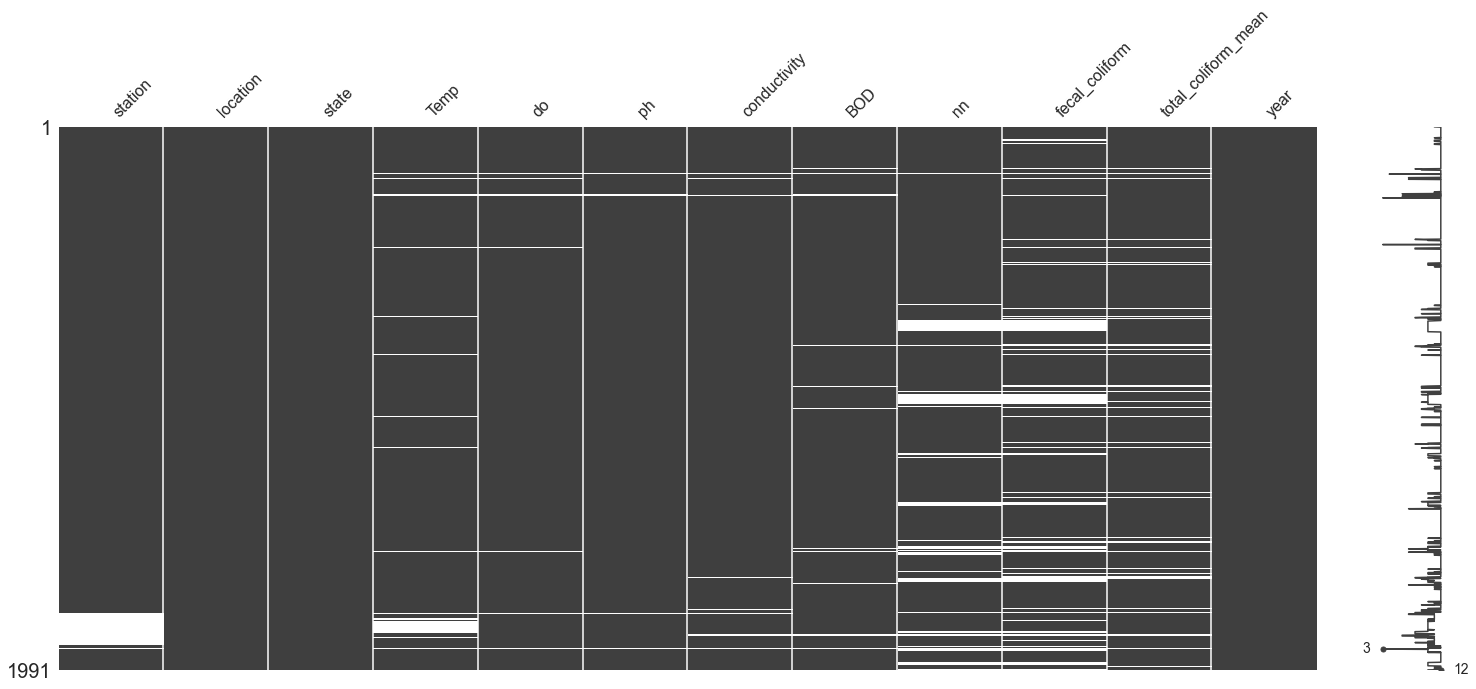

In [614]:
msno.matrix(df)

In [615]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


In [616]:
print(df.station.nunique())
print(df.state.nunique())
print(df.location.nunique())

320
203
666


# WQI calculation

## Rating calculation

The recommended values (Si) of all the parameters

In [617]:
do_s = 10
ph_s = 8.5
conductivity_s = 1000
bod_s = 5
nitrate_s = 45
fecal_coliform_s = 100
total_coliform_s = 1000

Creating a df just to keep the qi measurements

In [618]:
df_qi = pd.DataFrame()

In [619]:
df_qi['qi_conductivity']=100*df['conductivity']/(conductivity_s)
df_qi['qi_do']=100*(df['do']-14.6)/(do_s-14.6)
df_qi['qi_ph']=100*(df['ph']-7)/(ph_s-7)
df_qi['qi_bod']=100*(df['BOD'])/(bod_s)
df_qi['qi_nn']=100*(df['nn'])/(nitrate_s)
df_qi['qi_fecal_coliform']=100*(df['fecal_coliform'])/(fecal_coliform_s)
df_qi['qi_total_coliform_mean']=100*(df['total_coliform_mean'])/(total_coliform_s)

In [620]:
df_qi

,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean
0,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7
1,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1
2,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0
3,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3
4,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0
...,...,...,...,...,...,...,...
1986,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2
1987,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5
1988,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0
1989,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2


In [621]:
df

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003


Parameter weights

In [622]:
do_w = 0.2213
ph_w = 0.2604
conductivity_w = 0.0022
bod_w = 0.4426
n_w = 0.0492
fecal_coliform_w = 0.0221
total_coliform_w = 0.0022
w_total =  1

Merging the raw measurements and the qi measurements into a new df

In [623]:
df2 = pd.concat([df,df_qi],axis=1)

In [624]:
df2

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2


Calculating the wqi's

In [625]:
df2['wqi']=df2['qi_conductivity']*conductivity_w+\
           df2['qi_do']*do_w+\
           df2['qi_ph']*ph_w+\
           df2['qi_bod']*bod_w+\
           df2['qi_nn']*n_w+\
           df2['qi_fecal_coliform']*fecal_coliform_w+\
           df2['qi_total_coliform_mean']*total_coliform_w

In [626]:
df2

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean,wqi
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,20.30,171.739130,33.333333,NaN,0.222222,11.000,2.7,NaN
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,18.90,193.478261,13.333333,40.0,0.444444,4953.000,839.1,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,17.90,180.434783,-6.666667,34.0,0.222222,3243.000,533.0,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,6.40,191.304348,-6.666667,76.0,1.111111,5382.000,844.3,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,8.30,191.304348,20.000000,38.0,0.888889,3428.000,550.0,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,0.72,145.652174,48733.333333,54.0,1.151111,0.518,20.2,12746.407333
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,0.63,154.347826,38533.333333,52.0,0.344444,0.155,31.5,10091.343432
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,0.62,152.173913,6066.666667,24.0,NaN,NaN,57.0,NaN
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,0.65,150.000000,5600.000000,26.0,NaN,NaN,56.2,NaN


In [627]:
df2.describe()

,station,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,qi_conductivity,qi_do,qi_ph,qi_bod,qi_nn,qi_fecal_coliform,qi_total_coliform_mean,wqi
count,1869.00000,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1991.000000,1966.000000,1960.000000,1.983000e+03,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1.625000e+03
mean,1953.64473,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05,2010.038172,178.646639,178.420941,7.006045e+03,138.800975,3.606842,3.625294e+05,5.336872e+04,9.512031e+03
std,744.95769,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07,3.057333,555.227622,28.976906,1.252620e+05,588.000524,9.089957,8.764767e+06,1.423428e+06,2.008659e+05
min,2.00000,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000,0.040000,69.565217,-4.666667e+02,2.000000,0.000000,0.000000e+00,0.000000e+00,-1.057922e+01
25%,1448.00000,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02,2008.000000,7.800000,160.869565,-6.666667e+00,24.000000,0.533333,2.600000e+01,1.060000e+01,5.424306e+01
50%,1861.00000,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000,18.300000,171.739130,2.000000e+01,37.930000,1.146667,2.210000e+02,4.680000e+01,7.234219e+01
75%,2423.00000,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03,2013.000000,59.275000,189.130435,4.666667e+01,72.000000,3.333333,9.965000e+02,1.919000e+02,1.077640e+02
max,3473.00000,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000,6570.000000,317.391304,4.473867e+06,10690.000000,241.555556,2.725216e+08,5.110909e+07,6.136170e+06


# adding the WQI to the original dataframe

Adding only the wqi to the original dataframe.

In [628]:
df3 = pd.concat([df,df2.wqi],axis=1)

In [629]:
df3

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi
0,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,NaN,0.100,11.000,27.0,2014,NaN
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NaN,7.9,738.0,7.2,2.7,0.518,0.518,202.0,2003,12746.407333
1987,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.0,7.5,585.0,6.3,2.6,0.155,0.155,315.0,2003,10091.343432
1988,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.0,7.6,98.0,6.2,1.2,NaN,NaN,570.0,2003,NaN
1989,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.0,7.7,91.0,6.5,1.3,NaN,NaN,562.0,2003,NaN


In [630]:
df3.describe()

,station,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi
count,1869.00000,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.675000e+03,1.859000e+03,1991.000000,1.625000e+03
mean,1953.64473,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,3.625294e+05,5.336872e+05,2010.038172,9.512031e+03
std,744.95769,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,8.764767e+06,1.423428e+07,3.057333,2.008659e+05
min,2.00000,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,0.000000e+00,2003.000000,-1.057922e+01
25%,1448.00000,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,2.600000e+01,1.060000e+02,2008.000000,5.424306e+01
50%,1861.00000,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,2.210000e+02,4.680000e+02,2011.000000,7.234219e+01
75%,2423.00000,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,9.965000e+02,1.919000e+03,2013.000000,1.077640e+02
max,3473.00000,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,2.725216e+08,5.110909e+08,2014.000000,6.136170e+06


# Handling missing values

We'll just remove them

<AxesSubplot:>

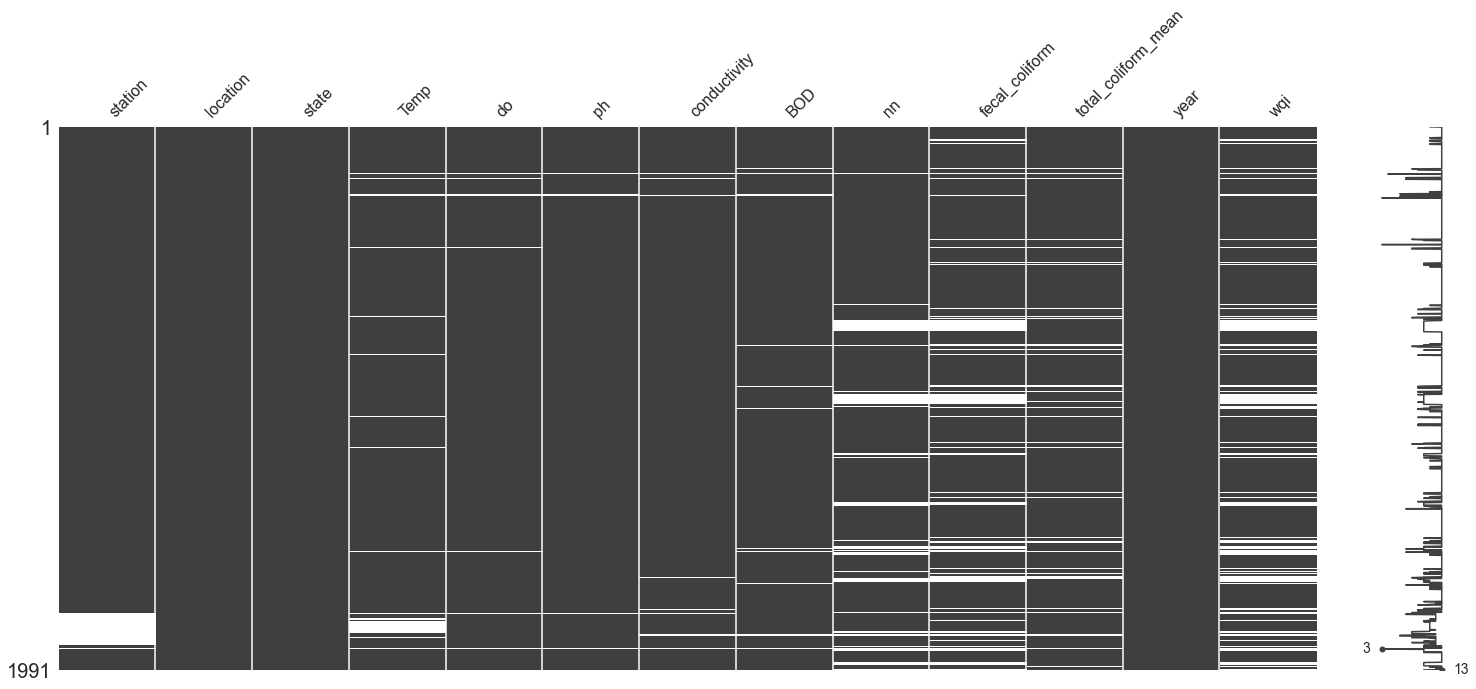

In [631]:
msno.matrix(df3)

In [632]:
df3.isnull().sum()

station                122
location                 0
state                    0
Temp                    92
do                      31
ph                       8
conductivity            25
BOD                     43
nn                     225
fecal_coliform         316
total_coliform_mean    132
year                     0
wqi                    366
dtype: int64

In [633]:
df4= df3.dropna()

In [634]:
df4

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246
5,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014,127.971746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160.0,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003,3017.018760
1982,1161.0,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003,3650.116506
1984,1328.0,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003,2467.864123
1985,1329.0,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003,2288.522202


<AxesSubplot:>

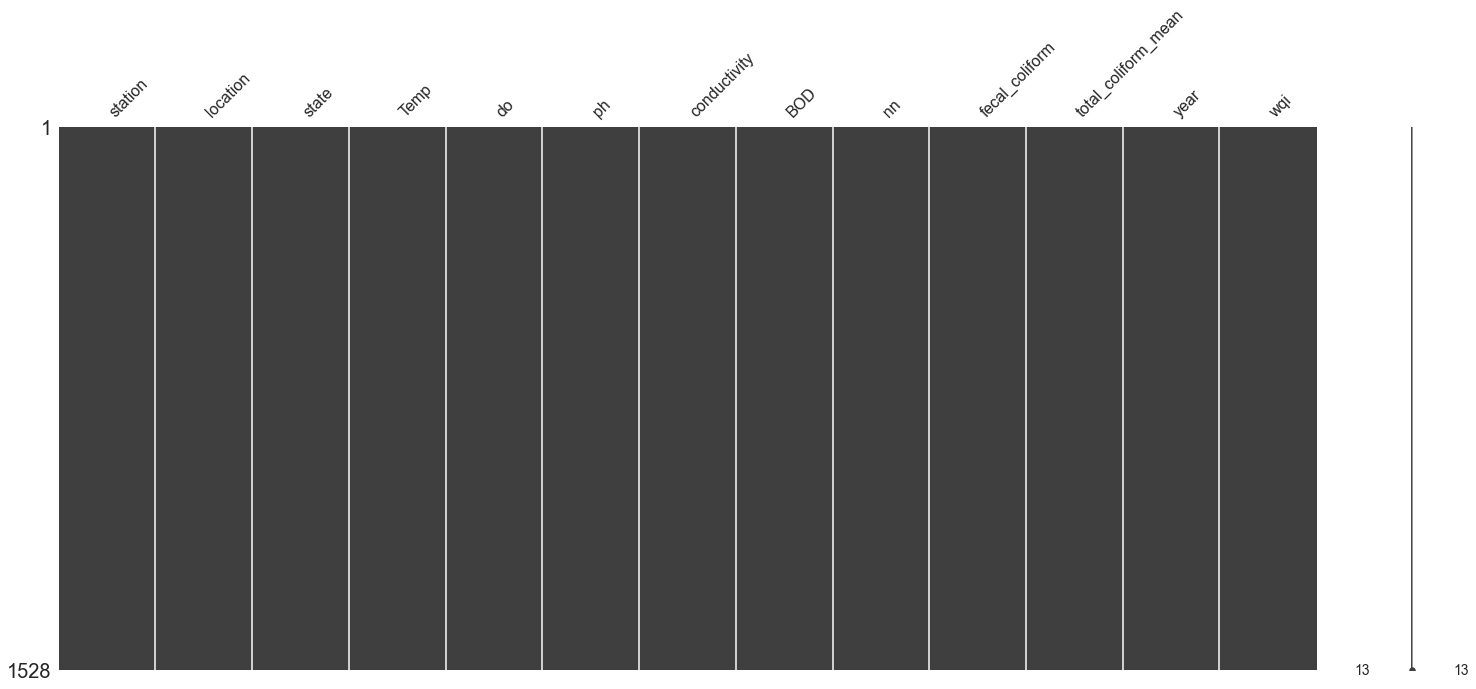

In [635]:
msno.matrix(df4)

# WQC classification

In [636]:
def calc_wqc(wqi):
    WQI = wqi
    if WQI <= 25:
        WQC = 5
    elif WQI > 25 and WQI <= 50:
        WQC = 4
    elif WQI > 50 and WQI <= 75:
        WQC = 3
    elif WQI > 75 and WQI <= 100:
        WQC = 2
    elif WQI > 100:
        WQC = 1
    return WQC


In [637]:

wqc = []

for i in df4.wqi:
    wqc.append(calc_wqc(i))


In [638]:
df5 = df4

In [639]:
df5['wqc'] = wqc
df5

C:\Users\kople\AppData\Local\Temp\ipykernel_11416\708709747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['wqc'] = wqc


,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi,wqc
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.200,4953.000,8391.0,2014,175.363506,1
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.100,3243.000,5330.0,2014,126.135831,1
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.500,5382.000,8443.0,2014,195.105659,1
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.400,3428.000,5500.0,2014,141.393246,1
5,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.100,2853.000,4049.0,2014,127.971746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1160.0,"TAMBIRAPARANI AT CHERANMADEVI,CAUSE WAY,TAMILNADU",NAN,31.0,7.3,178.0,6.7,1.5,0.138,0.138,190.0,2003,3017.018760,1
1982,1161.0,"TAMBIRAPARANI AT TIRUNELVELI,COLLECTORATE, ...",NAN,29.0,7.1,214.0,6.8,2.3,0.585,0.585,350.0,2003,3650.116506,1
1984,1328.0,"TAMBIRAPARANI AT PAPPANKULAM,TAMILNADU",NAN,28.0,6.9,146.0,7.1,2.0,0.506,0.506,38.0,2003,2467.864123,1
1985,1329.0,"TAMBIRAPARANI AT RAIL BDG. NR. AMBASAMUDAM, TA...",NAN,28.0,7.0,136.0,7.5,1.4,0.609,0.609,205.0,2003,2288.522202,1


In [640]:
df5.describe()

,station,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi,wqc
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1.528000e+03,1.528000e+03,1528.000000,1.528000e+03,1528.000000
mean,1946.056937,26.284840,6.332807,70.785863,1798.718606,4.906314,1.410666,3.964382e+05,6.445488e+05,2010.580497,1.009416e+04,2.437173
std,777.965463,3.272678,1.290948,1128.956395,5279.702522,17.519698,2.838844,9.176190e+06,1.569837e+07,2.754065,2.071335e+05,1.069910
min,17.000000,10.000000,0.000000,2.600000,3.700000,0.100000,0.000000,0.000000e+00,4.000000e+00,2003.000000,-1.057922e+01,1.000000
25%,1442.000000,25.000000,5.900000,6.900000,73.000000,1.100000,0.250000,3.000000e+01,1.407500e+02,2009.000000,5.423292e+01,1.000000
50%,1705.000000,27.000000,6.700000,7.200000,165.000000,1.700000,0.508000,2.280000e+02,5.910000e+02,2011.000000,7.202600e+01,3.000000
75%,2338.000000,28.325000,7.100000,7.600000,612.750000,3.400000,1.437500,9.642500e+02,2.259500e+03,2013.000000,1.068747e+02,3.000000
max,3473.000000,35.000000,10.000000,28598.000000,47156.000000,534.500000,58.100000,2.725216e+08,5.110909e+08,2014.000000,6.136170e+06,5.000000


<AxesSubplot:>

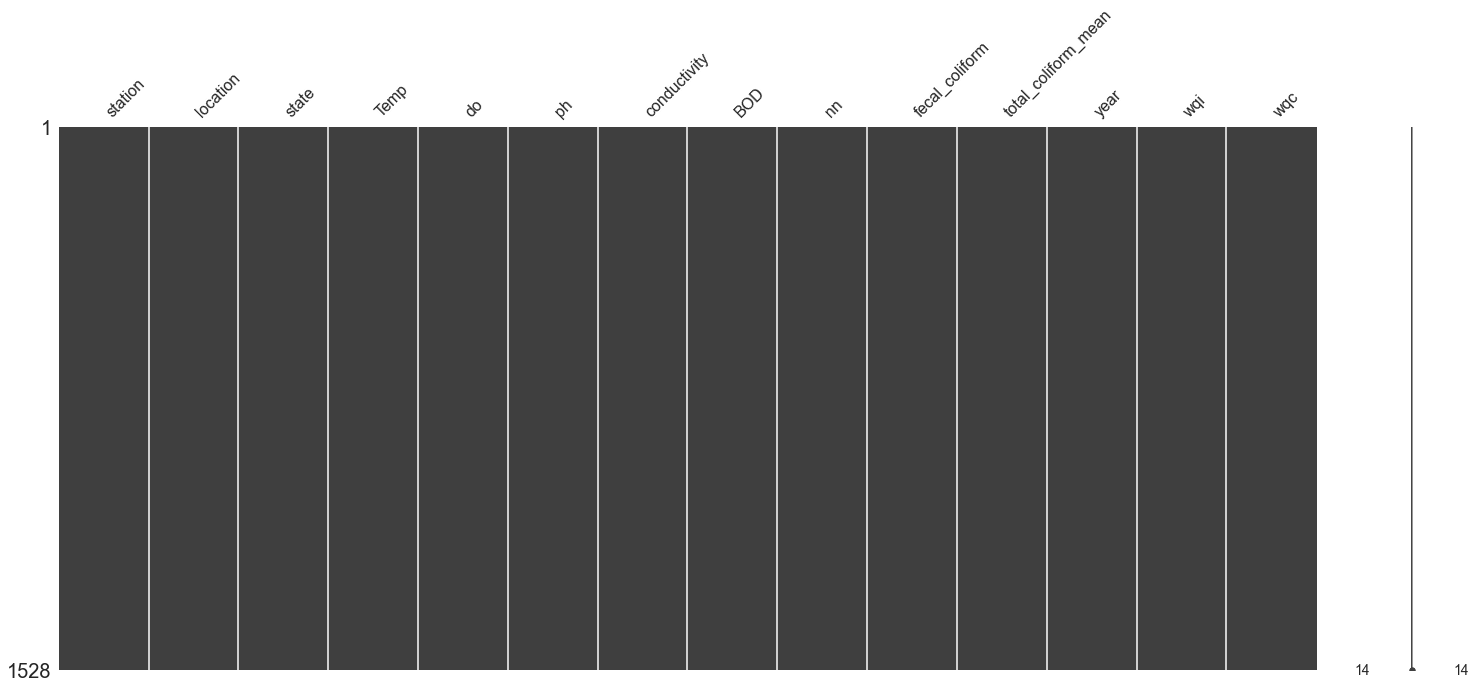

In [641]:

msno.matrix(df5)

# Preprocessing for ML models

## Grouping by river(location) and year, by the mean

In [642]:
df5.head()

,station,location,state,Temp,do,ph,conductivity,BOD,nn,fecal_coliform,total_coliform_mean,year,wqi,wqc
1,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0,0.2,4953.0,8391.0,2014,175.363506,1
2,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7,0.1,3243.0,5330.0,2014,126.135831,1
3,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8,0.5,5382.0,8443.0,2014,195.105659,1
4,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9,0.4,3428.0,5500.0,2014,141.393246,1
5,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.0,5.5,7.4,81.0,1.5,0.1,2853.0,4049.0,2014,127.971746,1


In [643]:
agg = df5.groupby(['location','year'])['wqc'].median()

In [644]:
agg

location                          year
ACHENKOIL AT CHENNITHULA          2010    3.0
                                  2011    4.0
                                  2012    3.0
ACHENKOIL AT CHENNITHULA, KERALA  2003    1.0
                                  2006    2.0
                                         ... 
ZUARI AT PANCHAWADI               2010    4.0
                                  2011    4.0
                                  2012    2.0
                                  2013    2.0
                                  2014    1.0
Name: wqc, Length: 1368, dtype: float64

In [645]:
data= agg.reset_index()

In [646]:
data

,location,year,wqc
0,ACHENKOIL AT CHENNITHULA,2010,3.0
1,ACHENKOIL AT CHENNITHULA,2011,4.0
2,ACHENKOIL AT CHENNITHULA,2012,3.0
3,"ACHENKOIL AT CHENNITHULA, KERALA",2003,1.0
4,"ACHENKOIL AT CHENNITHULA, KERALA",2006,2.0
...,...,...,...
1363,ZUARI AT PANCHAWADI,2010,4.0
1364,ZUARI AT PANCHAWADI,2011,4.0
1365,ZUARI AT PANCHAWADI,2012,2.0
1366,ZUARI AT PANCHAWADI,2013,2.0


# Converting wqc into categorical

In [647]:
data.wqc.dtype

dtype('float64')

In [648]:
data.wqc = data.wqc.astype('category')

In [686]:
from sklearn import  preprocessing
lab_enc = preprocessing.LabelEncoder()
data.wqc = lab_enc.fit_transform(data.wqc)

In [687]:
data.dtypes

location    object
year         int64
wqc          int64
dtype: object

# Encoding locations

In [650]:
dummies = pd.get_dummies(data.location)

In [651]:
dummies

,ACHENKOIL AT CHENNITHULA,"ACHENKOIL AT CHENNITHULA, KERALA","ACHENKOIL AT KALLARAKADAVU, PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE), PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE),PATHANAMTHITTA",ACHENKOIL AT THUMPAMON,"ACHENKOIL AT THUMPAMON, KERALA",AMARAVILA,"AMARAVILA, KERALA","AMBA AT D/S OF WAKEN BDG U/S OF JS PETROCHEMICALS, WAKENPHATA, ROHA",...,VASHISTI AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,VASHISTI RIVER AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT","VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT, TAMILNADU",WAH BLEI,"WAH BLEI AT RIANGDO, WEST KHASI HILLS","WAH BLEI AT SHDADDKHAR, WEST KHASI HILLS",ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS,"ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA",ZUARI AT PANCHAWADI
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [688]:
data_numerical = pd.concat([data,dummies],axis='columns')

In [689]:
data_numerical

,location,year,wqc,ACHENKOIL AT CHENNITHULA,"ACHENKOIL AT CHENNITHULA, KERALA","ACHENKOIL AT KALLARAKADAVU, PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE), PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE),PATHANAMTHITTA",ACHENKOIL AT THUMPAMON,"ACHENKOIL AT THUMPAMON, KERALA",...,VASHISTI AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,VASHISTI RIVER AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT","VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT, TAMILNADU",WAH BLEI,"WAH BLEI AT RIANGDO, WEST KHASI HILLS","WAH BLEI AT SHDADDKHAR, WEST KHASI HILLS",ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS,"ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA",ZUARI AT PANCHAWADI
0,ACHENKOIL AT CHENNITHULA,2010,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACHENKOIL AT CHENNITHULA,2011,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ACHENKOIL AT CHENNITHULA,2012,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"ACHENKOIL AT CHENNITHULA, KERALA",2003,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"ACHENKOIL AT CHENNITHULA, KERALA",2006,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,ZUARI AT PANCHAWADI,2010,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1364,ZUARI AT PANCHAWADI,2011,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1365,ZUARI AT PANCHAWADI,2012,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1366,ZUARI AT PANCHAWADI,2013,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [690]:
data_numerical.drop(columns=['location','ACHENKOIL AT CHENNITHULA'],inplace=True)

In [691]:
data_numerical

,year,wqc,"ACHENKOIL AT CHENNITHULA, KERALA","ACHENKOIL AT KALLARAKADAVU, PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE), PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE),PATHANAMTHITTA",ACHENKOIL AT THUMPAMON,"ACHENKOIL AT THUMPAMON, KERALA",AMARAVILA,"AMARAVILA, KERALA",...,VASHISTI AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,VASHISTI RIVER AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT","VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT, TAMILNADU",WAH BLEI,"WAH BLEI AT RIANGDO, WEST KHASI HILLS","WAH BLEI AT SHDADDKHAR, WEST KHASI HILLS",ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS,"ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA",ZUARI AT PANCHAWADI
0,2010,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2012,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2003,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,2010,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1364,2011,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1365,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1366,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [692]:
data_numerical[data.wqc==1]

,year,wqc,"ACHENKOIL AT CHENNITHULA, KERALA","ACHENKOIL AT KALLARAKADAVU, PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE), PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE),PATHANAMTHITTA",ACHENKOIL AT THUMPAMON,"ACHENKOIL AT THUMPAMON, KERALA",AMARAVILA,"AMARAVILA, KERALA",...,VASHISTI AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,VASHISTI RIVER AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT","VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT, TAMILNADU",WAH BLEI,"WAH BLEI AT RIANGDO, WEST KHASI HILLS","WAH BLEI AT SHDADDKHAR, WEST KHASI HILLS",ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS,"ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA",ZUARI AT PANCHAWADI
4,2006,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,2006,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26,2006,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1335,2013,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1355,2007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1365,2012,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [693]:
x = data_numerical.drop(columns='wqc')

In [694]:
y = data.wqc

In [ ]:
x

In [ ]:
y

In [531]:
x.isnull().sum()

location    0
year        0
dtype: int64

In [532]:
y.isnull().sum()

0

# Splitting into training and testing data

In [695]:
from sklearn.model_selection import train_test_split

In [696]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.25)

In [697]:
x_train

,year,"ACHENKOIL AT CHENNITHULA, KERALA","ACHENKOIL AT KALLARAKADAVU, PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE), PATHANAMTHITTA","ACHENKOIL AT PANDALAM (NEAR AYYAPPA TEMPLE),PATHANAMTHITTA",ACHENKOIL AT THUMPAMON,"ACHENKOIL AT THUMPAMON, KERALA",AMARAVILA,"AMARAVILA, KERALA","AMBA AT D/S OF WAKEN BDG U/S OF JS PETROCHEMICALS, WAKENPHATA, ROHA",...,VASHISTI AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,VASHISTI RIVER AT U/S OF THREE M PAPER MILLS NEAR M/S MULTIFILMS PLASTIC PVT. LTD. AT KHERDI.,"VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT","VASISTA AT SALEM, D/S OF SAGO INDUSRIES EFFLUENT, TAMILNADU",WAH BLEI,"WAH BLEI AT RIANGDO, WEST KHASI HILLS","WAH BLEI AT SHDADDKHAR, WEST KHASI HILLS",ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS,"ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOINS, GOA",ZUARI AT PANCHAWADI
176,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
986,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1284,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,2014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
948,2012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [698]:
y_train

176     1
986     3
40      0
1284    5
97      5
       ..
1129    3
442     0
948     3
67      1
961     1
Name: wqc, Length: 1026, dtype: int64

# SVR Cross Validation

In [509]:
from sklearn.model_selection import cross_val_score

In [510]:
# clf = SVR(kernel='linear', C=1, gamma='scale')
# scores = cross_val_score(clf, x, y, cv=5)

# KNN

In [699]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [703]:
pipe_knn = Pipeline([
    ('scaler',StandardScaler()),
    ("knn",KNeighborsClassifier(n_neighbors=3))
])

In [704]:
pipe_knn.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [707]:
y_pred = pipe_knn.predict(x_test)

# KNN performance

In [721]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [719]:
pipe_knn.score(x_test,y_test)

0.543859649122807

In [709]:
accuracy_score(y_test,y_pred)

0.543859649122807

In [712]:
classification_report(y_test,y_pred)

C:\Users\kople\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kople\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kople\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kople\anaconda3\lib\site-packages\sklearn\metrics\_cla

'              precision    recall  f1-score   support\n\n           0       0.67      0.68      0.67        91\n           1       0.36      0.54      0.43        71\n           2       0.00      0.00      0.00         0\n           3       0.68      0.54      0.60       130\n           4       0.00      0.00      0.00         1\n           5       0.40      0.34      0.37        47\n           6       0.00      0.00      0.00         2\n\n    accuracy                           0.54       342\n   macro avg       0.30      0.30      0.30       342\nweighted avg       0.57      0.54      0.55       342\n'

In [720]:
cm = confusion_matrix(y_test,y_pred)

In [725]:
cm

array([[62, 19,  0,  5,  0,  5,  0],
       [13, 38,  0, 18,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 8, 35,  0, 70,  0, 17,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [10, 12,  0,  9,  0, 16,  0],
       [ 0,  1,  0,  1,  0,  0,  0]], dtype=int64)

In [723]:
disp = ConfusionMatrixDisplay(cm)

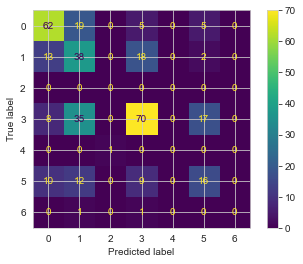

In [724]:
disp.plot()